In [37]:
import numpy as np #importing numpy.
import pandas as pd #importing pandas.
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
from scipy.ndimage.filters import gaussian_filter1d

In [8]:
df = pd.read_csv("applemobilitytrends.csv") 
# Preview the first 5 lines of the loaded data 
df.head()

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
0,country/region,Albania,driving,NaN,100.0,95.30,101.43,97.20,103.55,112.67,...,24.55,31.51,33.59,31.69,33.94,30.22,25.22,30.39,37.39,36.69
1,country/region,Albania,walking,NaN,100.0,100.68,98.93,98.46,100.85,100.13,...,27.93,36.72,34.46,35.39,34.80,34.63,29.00,35.22,41.83,37.53
2,country/region,Argentina,driving,NaN,100.0,97.07,102.45,111.21,118.45,124.01,...,14.54,26.67,27.25,27.61,28.73,30.99,25.92,16.57,27.45,27.12
3,country/region,Argentina,walking,NaN,100.0,95.11,101.37,112.67,116.72,114.14,...,10.59,18.44,19.01,18.47,20.39,22.32,23.31,16.36,18.48,17.49
4,country/region,Australia,driving,NaN,100.0,102.98,104.21,108.63,109.08,89.00,...,53.34,56.93,58.06,59.69,62.87,47.84,41.89,55.39,59.09,59.46


In [9]:
# Saudi all
Saudi = df.loc[df['region'] == "Saudi Arabia"]
Saudi.head()

# Saudi Riyadh

Riyadh = df.loc[df['region'] == "Riyadh"]


#US
US = df.loc[df['region'] == "United States"]


# US DC
DC = df.loc[df['region'] == "Washington DC"]
DC.head()

NY = df.loc[df['region'] == "New York"]
NY.head()

# Germany
Germany = df.loc[df['region'] == "Berlin"]
Germany.head(7)

# southkorea
southkorea = df.loc[df['region'] == "Seoul"]
southkorea.head(7)

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
500,city,Seoul,driving,서울,100.0,100.66,102.36,110.03,124.82,114.68,...,51.53,54.63,52.78,56.89,58.45,65.23,61.27,57.84,58.06,62.91
501,city,Seoul,walking,서울,100.0,100.85,104.43,113.48,134.96,127.99,...,32.42,35.88,32.67,35.26,37.70,49.15,51.59,39.66,38.05,40.64


In [10]:
southkorea = df.loc[df['region'] == "Seoul"]
southkorea.head(7)

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
500,city,Seoul,driving,서울,100.0,100.66,102.36,110.03,124.82,114.68,...,51.53,54.63,52.78,56.89,58.45,65.23,61.27,57.84,58.06,62.91
501,city,Seoul,walking,서울,100.0,100.85,104.43,113.48,134.96,127.99,...,32.42,35.88,32.67,35.26,37.70,49.15,51.59,39.66,38.05,40.64


In [11]:
headers = list(df.columns.values)
headers.pop(0)
headers.pop(0)
headers.pop(0)
headers.pop(0)
headers.pop(len(headers)-1)
headers.pop(len(headers)-1)
for x in range(0,56):
    headers.pop(0)
print(headers)

['2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26']


In [12]:
headersdc = list(df.columns.values)
headersdc.pop(0)
headersdc.pop(0)
headersdc.pop(0)
headersdc.pop(0)
# headersdc.pop(len(headers)-1)
# headersdc.pop(len(headers)-1)
for x in range(0,8):
    headersdc.pop(0)
print(headersdc)

['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020

In [13]:
# DC
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np

drivingdc = list(DC.iloc[0])
drivingdc.pop(0)
drivingdc.pop(0)
drivingdc.pop(0)
drivingdc.pop(0)
for x in range(0,8):
    drivingdc.pop(0)
walkingdc = list(DC.iloc[1])
walkingdc.pop(0)
walkingdc.pop(0)
walkingdc.pop(0)
walkingdc.pop(0)

print(walkingdc)
for x in range(0,8):
    walkingdc.pop(0)
print(len(walkingdc))

[100.0, 100.78, 103.92, 105.02, 112.26, 96.01, 87.76, 92.49, 96.68, 98.26, 104.15, 120.06, 110.16, 82.43, 99.08, 96.65, 96.56, 99.24, 109.25, 104.35, 80.2, 95.86, 97.36, 94.3, 93.88, 104.65, 102.43, 83.16, 92.82, 98.7, 100.22, 104.81, 120.18, 109.07, 94.05, 100.5, 102.04, 101.29, 101.45, 114.7, 113.41, 88.44, 97.66, 102.08, 101.57, 100.94, 119.47, 109.45, 88.1, 99.54, 103.07, 104.46, 106.06, 114.65, 113.59, 88.74, 100.27, 95.38, 90.73, 78.45, 76.38, 60.2, 44.48, 47.06, 40.1, 36.31, 33.61, 33.13, 25.68, 21.63, 22.98, 23.47, 21.16, 22.62, 23.22, 19.22, 18.71, 21.24, 18.3, 17.95, 17.87, 18.21, 16.45, 15.54, 18.87, 17.59, 18.79, 16.92, 17.76, 16.99, 14.23, 17.01, 17.37, 17.02, 17.1, 17.14, 16.61, 16.66, 18.2, 17.76, 17.58, 16.13, 17.53, 16.78, 15.9, 18.61, 17.97]
99


In [44]:
# Korea
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np

# [2] step 

drivingk = list(southkorea.iloc[0])
drivingk.pop(0)
drivingk.pop(0)
drivingk.pop(0)
drivingk.pop(0)

# drop until first case

for x in range(0,7):
    drivingk.pop(0)
walkingk = list(southkorea.iloc[1])
walkingk.pop(0)
walkingk.pop(0)
walkingk.pop(0)
walkingk.pop(0)

print(walkingk)

# drop until first case
for x in range(0,7):
    walkingk.pop(0)
print(len(walkingk))

[100.0, 100.85, 104.43, 113.48, 134.96, 127.99, 116.61, 108.14, 104.25, 97.35, 96.61, 102.11, 114.11, 110.58, 103.24, 106.27, 101.68, 111.75, 110.55, 85.79, 78.42, 79.81, 76.1, 70.49, 72.7, 83.34, 78.42, 77.69, 79.27, 76.88, 82.92, 84.83, 91.46, 76.45, 68.18, 77.37, 81.66, 82.46, 76.05, 75.54, 67.72, 63.38, 55.89, 59.06, 54.0, 43.17, 41.97, 37.88, 38.45, 35.88, 35.86, 34.98, 36.95, 38.55, 38.25, 40.22, 33.3, 35.72, 34.7, 38.99, 38.81, 35.21, 33.15, 33.46, 34.7, 32.73, 35.34, 45.46, 42.07, 39.99, 36.96, 39.03, 37.88, 35.61, 42.31, 40.02, 38.54, 38.57, 38.62, 37.36, 37.63, 45.59, 37.76, 37.17, 35.92, 37.53, 36.18, 37.31, 47.29, 39.34, 37.89, 39.21, 47.89, 40.2, 35.51, 44.68, 41.97, 32.42, 35.88, 32.67, 35.26, 37.7, 49.15, 51.59, 39.66, 38.05, 40.64]
100


In [45]:
headersk = list(df.columns.values)
# extra cols
headersk.pop(0)
headersk.pop(0)
headersk.pop(0)
headersk.pop(0)

# drop until first case
for x in range(0,7):
    headersk.pop(0)
print(len(headersk))

100


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
banning gatherings
School closure
Pause plan


C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


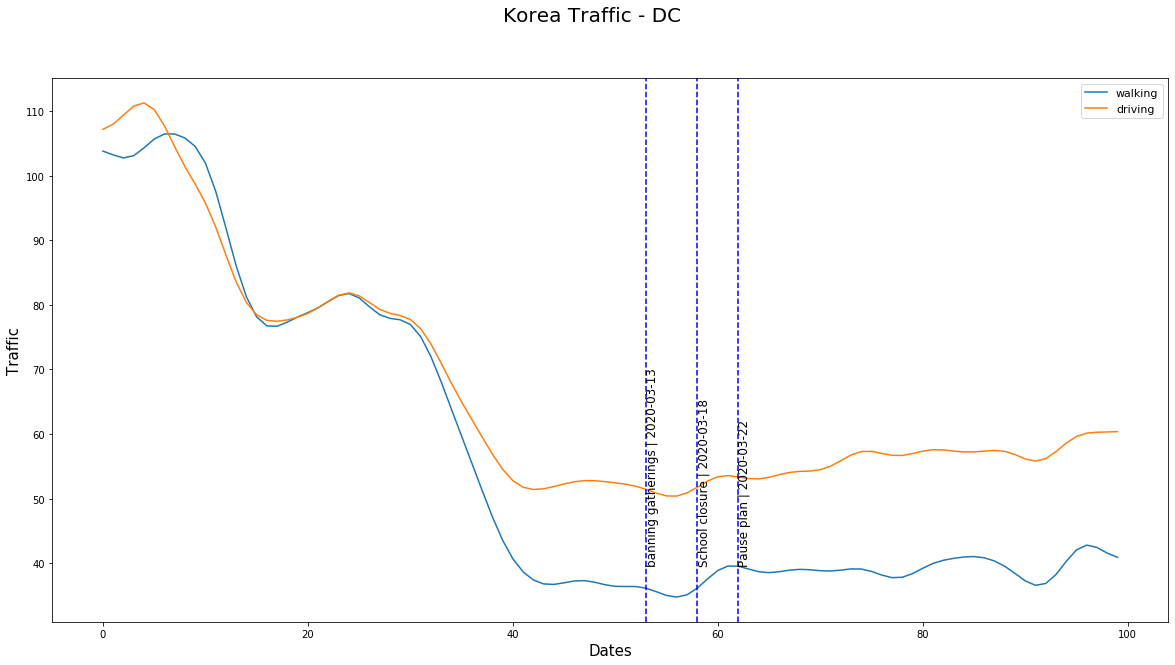

In [43]:
kdays = []

# map to days
for x in range(0,len(headersk)):
    kdays.append(x)

print(kdays)
    
# store days and dates 
column_names = ["cases", "Days", "Dates", 'Actions']
eventk = pd.DataFrame(columns = column_names)

eventk['Cases'] = ''
# change them based on country
eventk['Days'] = kdays 
eventk['Dates'] = headersk
eventk['Actions'] = ''

# change them based on country
ActionsDatek = ['2020-03-13','2020-03-18','2020-03-22']
ActionsValuek = ['banning gatherings','School closure','Pause plan']


lis1 = []
z = 0
for w in ActionsDatek:
    for x in range(0,len(list(walkingk))):
        if(eventk.Dates.iloc[x] == w):
            eventk.Actions.iloc[x] = ActionsValuek[z]

    print(ActionsValuek[z])
    z = 1 + z
    

evDaysk = eventk['Days']
evActionsk = list(eventk['Actions'])
evdatek = eventk['Dates']


plt.figure(figsize=(20, 10))
ysmoothed = gaussian_filter1d(walkingk, sigma=2)
plt.plot(kdays, ysmoothed, label="walking")
ysmoothed2 = gaussian_filter1d(drivingk, sigma=2)
plt.plot(kdays, ysmoothed2, label="driving")
plt.suptitle('Korea Traffic - DC',size=20)
plt.xlabel("Dates",size=15)
plt.ylabel("Traffic",size=15)



j=0
for x in evDaysk:
    if evActionsk[j] != '':
        plt.axvline(x,color='b',linestyle='dashed')
        plt.text(x,40,evActionsk[j] + " | " + str(evdatek[j]),rotation=90,fontsize=12)
    j = j + 1

plt.legend(prop={'size': 11})
plt.show()

In [46]:
# plot Riyadh
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np

Riyadh.head(1)
driving = list(Riyadh.iloc[0])
driving.pop(0)
driving.pop(0)
driving.pop(0)
driving.pop(0)
driving.pop(len(headers)-1)
driving.pop(len(headers)-1)
for x in range(0,56):
    driving.pop(0)
walking = list(Riyadh.iloc[1])
walking.pop(0)
walking.pop(0)
walking.pop(0)
walking.pop(0)
walking.pop(len(headers)-1)
walking.pop(len(headers)-1)

print(walking)
for x in range(0,56):
    walking.pop(0)
print(len(walking))

[100.0, 97.12, 99.22, 102.83, 102.88, 98.04, 91.92, 92.01, 86.07, 87.85, 94.06, 96.99, 83.88, 84.89, 89.63, 91.32, 98.04, 110.5, 112.33, 101.19, 93.74, 95.21, 94.25, 94.38, 112.47, 118.31, 109.27, 97.03, 102.56, 93.15, 104.06, 108.86, 106.85, 97.99, 88.86, 94.34, 87.58, 95.94, 108.63, 107.17, 93.47, 88.54, 86.99, 94.16, 95.53, 125.71, 123.11, 108.58, 99.45, 92.47, 113.11, 119.73, 93.33, 91.14, 96.3, 102.88, 97.26, 102.79, 99.13, 86.3, 76.62, 74.06, 72.97, 68.49, 67.58, 65.71, 57.58, 48.86, 47.17, 46.76, 53.84, 49.36, 48.4, 50.27, 50.46, 55.16, 50.32, 55.75, 53.33, 50.18, 50.87, 51.78, 55.34, 56.3, 65.94, 54.79, 49.95, 49.22, 52.28, 47.76, 44.89, 49.27, 45.57, 43.84, 46.03, 49.63, 48.13, 47.49, 49.18, 45.66, 45.84, 43.79, 49.13, 57.53, 55.48]
49


In [47]:
saudi_cases = pd.read_csv("saudi-cases.csv", sep =";") 
saudi_cases = saudi_cases.loc[saudi_cases['City'] =="Riyadh"]
Saudi_daily = saudi_cases.loc[saudi_cases['Daily / Cumulative'] =="Daily"]
Saudi_daily = Saudi_daily.loc[saudi_cases['Indicator'] =="Cases"]
Saudi_daily = Saudi_daily.sort_values(by=['Date'])
saudi_cases = saudi_cases.loc[saudi_cases['Indicator'] =="Active cases"]
saudi_cases = saudi_cases.loc[saudi_cases['Daily / Cumulative'] =="Cumulative"]
saudi_cases = saudi_cases.sort_values(by=['Date'])
Saudi_daily.head(20)


,Daily / Cumulative,Indicator,Date,Event,region,City,Cases
18740,Daily,Cases,2020-03-02,First case of COVID-19,Riyadh,Riyadh,0
18756,Daily,Cases,2020-03-03,NaN,Riyadh,Riyadh,0
2049,Daily,Cases,2020-03-04,Umrah suspension,Riyadh,Riyadh,0
9379,Daily,Cases,2020-03-05,NaN,Riyadh,Riyadh,0
27519,Daily,Cases,2020-03-06,NaN,Riyadh,Riyadh,0
27538,Daily,Cases,2020-03-07,NaN,Riyadh,Riyadh,0
33589,Daily,Cases,2020-03-08,NaN,Riyadh,Riyadh,0
18869,Daily,Cases,2020-03-09,flights suspended to number of countries,Riyadh,Riyadh,1
27600,Daily,Cases,2020-03-10,NaN,Riyadh,Riyadh,0
27628,Daily,Cases,2020-03-11,NaN,Riyadh,Riyadh,0


In [48]:
dates = list(saudi_cases['Date'])
datesd = list(Saudi_daily['Date'])
print(len(datesd))

56


In [49]:
saudi_cases = saudi_cases.loc[(saudi_cases.Date > '2020-03-08')]
Saudi_daily = Saudi_daily.loc[(Saudi_daily.Date > '2020-03-08')]

In [50]:
days = []
for w in range(0,len(list(saudi_cases['Date']))):
    days.append(w)

saudi_cases['Days'] = days

daysd = []
for w in range(0,len(list(Saudi_daily['Date']))):
    daysd.append(w)

saudi_cases['Days'] = days
Saudi_daily['Days'] = daysd

print(saudi_cases)

      Daily / Cumulative     Indicator        Date  \
32773         Cumulative  Active cases  2020-03-09   
32797         Cumulative  Active cases  2020-03-10   
26790         Cumulative  Active cases  2020-03-11   
1336          Cumulative  Active cases  2020-03-12   
32853         Cumulative  Active cases  2020-03-13   
1373          Cumulative  Active cases  2020-03-14   
32889         Cumulative  Active cases  2020-03-15   
26891         Cumulative  Active cases  2020-03-16   
12743         Cumulative  Active cases  2020-03-17   
26924         Cumulative  Active cases  2020-03-18   
16196         Cumulative  Active cases  2020-03-19   
16219         Cumulative  Active cases  2020-03-20   
12821         Cumulative  Active cases  2020-03-21   
12837         Cumulative  Active cases  2020-03-22   
27018         Cumulative  Active cases  2020-03-23   
33049         Cumulative  Active cases  2020-03-24   
33074         Cumulative  Active cases  2020-03-25   
1598          Cumulative  Ac

In [51]:
print(len(walking))

49


In [52]:
Cases_df = list(saudi_cases['Cases'])
Days_df = list(saudi_cases['Days'])
Date_df = list(saudi_cases['Date'])


column_names = ["Cases", "Days", "Dates"]

ActionsDates = ['2020-03-09','2020-03-16','2020-03-21','2020-03-23','2020-03-26','2020-04-06','2020-04-12']
ActionsValues = ['School suspension','Work suspension/Malls, public places shutdown','public transportion','Curfew 6am-7pm','Riyadh lockdown','24h Curfew','Issuing permissions']

ActionsValues1 = []

column_names = ["Cases", "Days", "Dates"]

events = pd.DataFrame(columns = column_names)
events['Cases'] = Cases_df
events['Days'] = Days_df 
events['Dates'] = Date_df 
events['Actions'] = ""
i = 0

for w in range(0,7):
    events.Cases.iloc[w] = 1
    
for w in ActionsDates:
    for x in range(0,len(list(events['Dates']))):
        if(events.Dates.iloc[x] == w):
            events.Actions.iloc[x] = ActionsValues[i]

    print(ActionsValues[i])
    i = i +1



evDays = events['Days']
evActions = events['Actions']
evdates = events['Dates']
print(len(list(days)))
#events['Actions'] = ActionsValues1
# Day - Date - Cases

School suspension
Work suspension/Malls, public places shutdown
public transportion
Curfew 6am-7pm
Riyadh lockdown
24h Curfew
Issuing permissions
49


C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


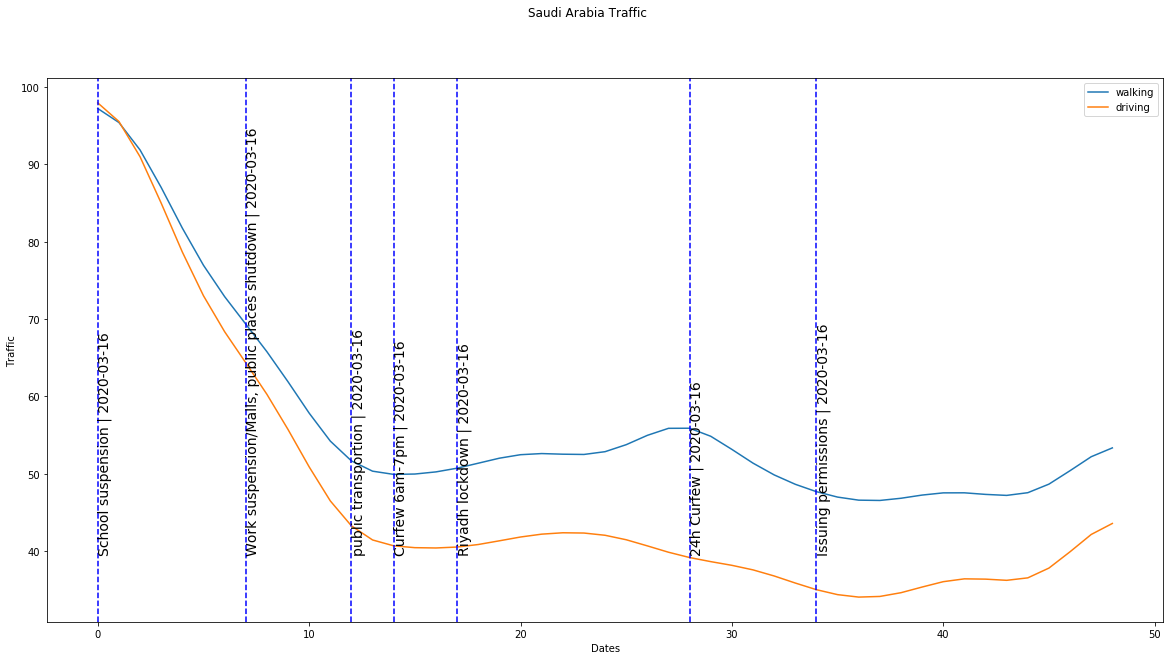

In [53]:
from scipy.interpolate import splrep, splev
from scipy.ndimage.filters import gaussian_filter1d

plt.figure(figsize=(20, 10))
# plt.plot(days, walking, label="walking");
# plt.plot(days, driving, label="driving");
ysmoothed = gaussian_filter1d(walking, sigma=2)
plt.plot(days, ysmoothed, label="walking")
ysmoothed2 = gaussian_filter1d(driving, sigma=2)
plt.plot(days, ysmoothed2, label="driving")
plt.suptitle('Saudi Arabia Traffic')
plt.xlabel("Dates")
plt.ylabel("Traffic")

# plt.plot(days, walking, label="walking");
# plt.plot(days, driving, label="driving");
# ysmoothed = gaussian_filter1d(np.log10(saudi_cases['Cases']), sigma=2)
# plt.plot(days, ysmoothed, label="Cases")
j=0
for x in evDays:
    if evActions[j] != '':
        plt.axvline(x,color='b',linestyle='dashed')
        plt.text(x,40,evActions[j]+ " | " + str(evdates[i]),rotation=90, fontsize=14)
    j = j + 1
# plt.suptitle('Saudi Arabia Cases')
# plt.xlabel("Dates")
# plt.ylabel("Cases")
plt.legend()
plt.show()



In [54]:
Cases_df = list(saudi_cases['Cases'])
Days_df = list(saudi_cases['Days'])
Date_df = list(saudi_cases['Date'])


column_names = ["Cases", "Days", "Dates"]

ActionsDates = ['2020-03-09','2020-03-15','2020-03-16','2020-03-21','2020-03-23','2020-03-26','2020-04-06','2020-04-12']
ActionsValues = ['flights suspended/School suspension','International flights suspension','Work suspension/Malls, public places shutdown','Domestic flights suspension/public transportion','Curfew 6am-7pm','Riyadh lockdown','24h Curfew','Issuing permissions']

ActionsValues1 = []


events = pd.DataFrame(columns = column_names)
events['Cases'] = Cases_df
events['Days'] = Days_df 
events['Dates'] = Date_df 
events['Actions'] = ""
i = 0

for w in range(0,7):
    events.Cases.iloc[w] = 1
    
for w in ActionsDates:
    for x in range(0,len(list(events['Dates']))):
        if(events.Dates.iloc[x] == w):
            events.Actions.iloc[x] = ActionsValues[i]

    print(ActionsValues[i])
    i = i +1
print(len(list(ActionsValues1)))
events.head(48)

evDays = events['Days']
evActions = events['Actions']
evdates = events['Dates']
#events['Actions'] = ActionsValues1
# Day - Date - Cases

flights suspended/School suspension
International flights suspension
Work suspension/Malls, public places shutdown
Domestic flights suspension/public transportion
Curfew 6am-7pm
Riyadh lockdown
24h Curfew
Issuing permissions
0


C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


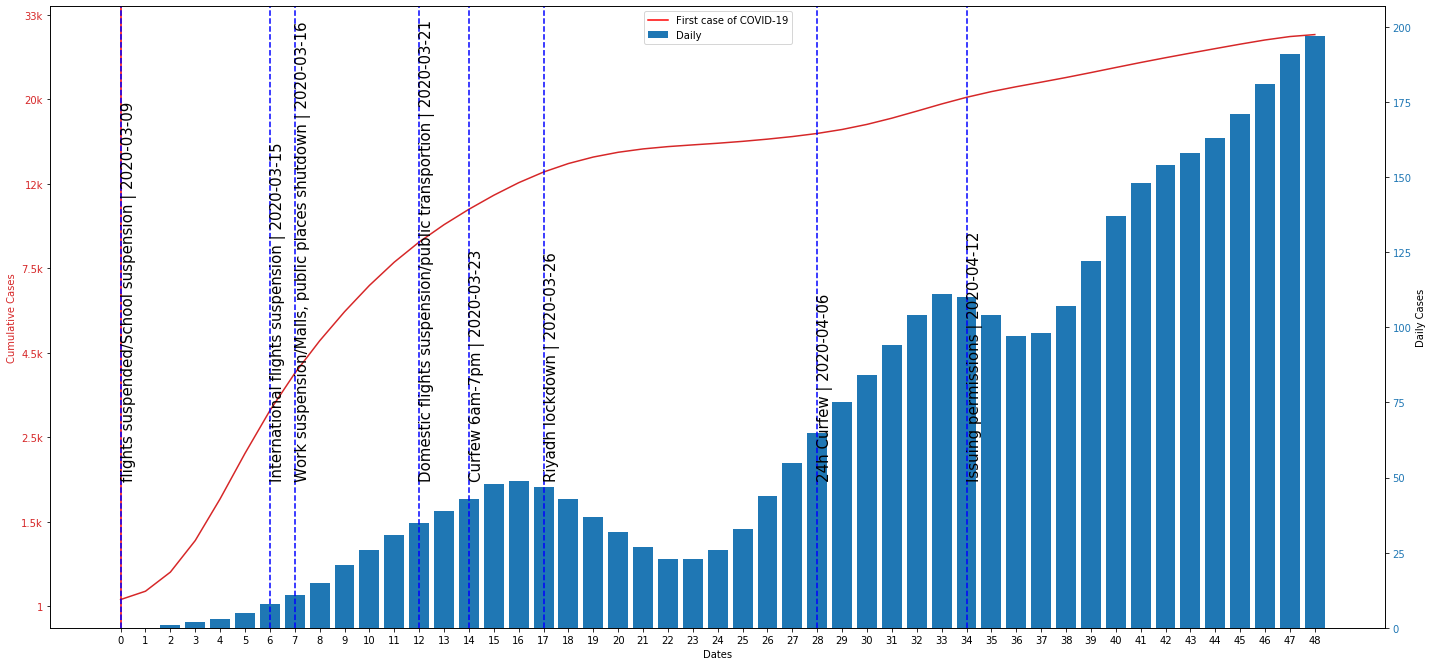

In [55]:
from scipy.interpolate import splrep, splev
from scipy.ndimage.filters import gaussian_filter1d

fig, ax1 = plt.subplots(figsize=(20, 10))

x =  np.linspace(0, 48, num=49)
ysmoothed = gaussian_filter1d(np.log10(list(saudi_cases['Cases'])), sigma=2)
color = 'tab:red'
ax1.set_xlabel('Dates')
ax1.set_ylabel('Cumulative Cases', color=color)
ax1.plot(days, ysmoothed, color=color, label = "Cumulative")
ax1.tick_params(axis='y', labelcolor=color)
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5], ['1', '1.5k', '2.5k','4.5k', '7.5k', '12k','20k', '33k']) 

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ysmoothed2 = gaussian_filter1d(Saudi_daily['Cases'], sigma=2)
x_axis = np.arange(len(days))
ax2.set_ylabel('Daily Cases')  # we already handled the x-label with ax1
ax2.bar(x_axis, ysmoothed2.tolist(), label="Daily")
# ax2.plot(days, ysmoothed2, label="Daily")
ax2.tick_params(axis='y', labelcolor=color)

# plt.suptitle('Saudi Arabia, Riyadh Cases')

plt.axvline('0',color='r',label="First case of COVID-19")
plt.xticks(x, days, size='small')
j = 0
for x in evDays:
    if evActions[j] != '':
        plt.axvline(x,color='b',linestyle='dashed')
        plt.text(x,50,evActions[j]+" | "+str(evdates[j]),rotation=90,fontsize=15)
    j = j + 1

#         plt.axvline(x,color='b',label="Action",linestyle='dashed')
#         plt.text(w,99,evActions[j],rotation=90,fontsize=12)
plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()








In [56]:
# compare 
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-03-2020.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-03-2020.csv')

In [57]:
from datetime import datetime
date_usa = datetime.strptime(df_confirmed.columns[-1],'%m/%d/%y').strftime("%m-%d-%Y")
df_usa = pd.read_csv('us-counties.csv')
df_usa['state'].unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

In [58]:

df_usa = pd.read_csv('us-counties.csv')
df_usa = df_usa.loc[df_usa['state'] =="Washington"]
df_usa = df_usa.drop(['deaths', 'fips','state','county'], axis=1)
df_usa = df_usa.groupby(['date']).sum()
days = []


df_usa.reset_index(inplace = True) 
df_usa = df_usa.drop(df_usa.index[len(df_usa)-1])

for w in range(0,len(list(df_usa['cases']))):
    days.append(w)

df_usa['Days'] = days

print(len(list(df_usa['date'])))
print(list(df_usa['cases']))

#######################################

df_usan = pd.read_csv('us-counties.csv');

df_usan = df_usan.loc[df_usan['state'] =="New York"]
df_usan = df_usan.drop(['deaths', 'fips','state','county'], axis=1)
df_usan = df_usan.groupby(['date']).sum()
daysn = []


df_usan.reset_index(inplace = True) 
df_usan = df_usan.drop(df_usan.index[len(df_usan)-1])

for w in range(0,len(list(df_usan['cases']))):
    daysn.append(w)

df_usan['Days'] = daysn

print(len(list(df_usan['date'])))
print(list(df_usan['cases']))

99
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 7, 10, 17, 23, 32, 47, 75, 86, 110, 141, 179, 279, 338, 419, 511, 609, 675, 794, 908, 1026, 1228, 1404, 1655, 1844, 2101, 2392, 2585, 3143, 3727, 4153, 4634, 4936, 5061, 5588, 6075, 6490, 6788, 7369, 8384, 8682, 9097, 9608, 9887, 10224, 10411, 10538, 10694, 10783, 11152, 11445, 11802, 11806, 12191, 12345, 12539, 12906, 13120, 13484, 13663, 13864, 14059]
59
[1, 1, 2, 11, 22, 44, 89, 106, 142, 173, 217, 326, 421, 610, 732, 950, 1374, 2382, 4152, 7102, 10356, 15168, 20875, 25666, 33067, 38988, 44636, 53364, 59568, 67216, 75832, 83890, 92770, 102945, 114996, 122911, 134108, 140081, 149401, 159937, 170512, 180458, 188694, 195031, 202208, 213779, 222284, 229642, 236763, 242817, 247543, 251720, 257246, 263460, 271621, 282174, 288076, 292027, 295137]


C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


banning gatherings
School shutdown
Home lockdown


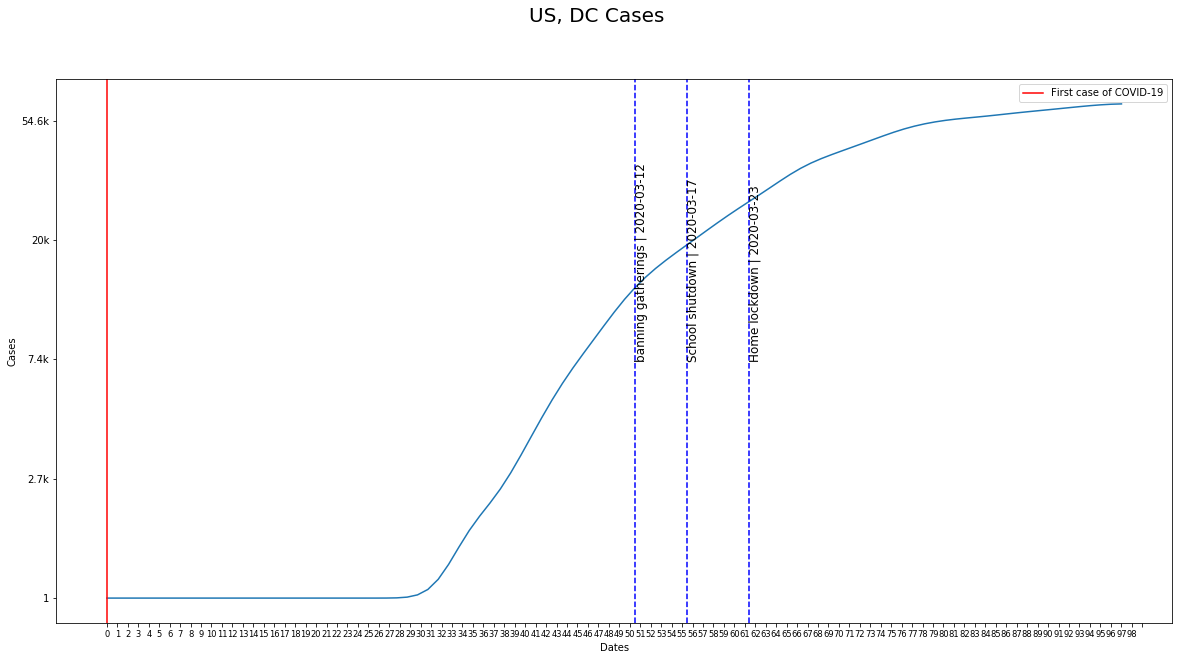

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


banning gatherings
School closure
Pause plan


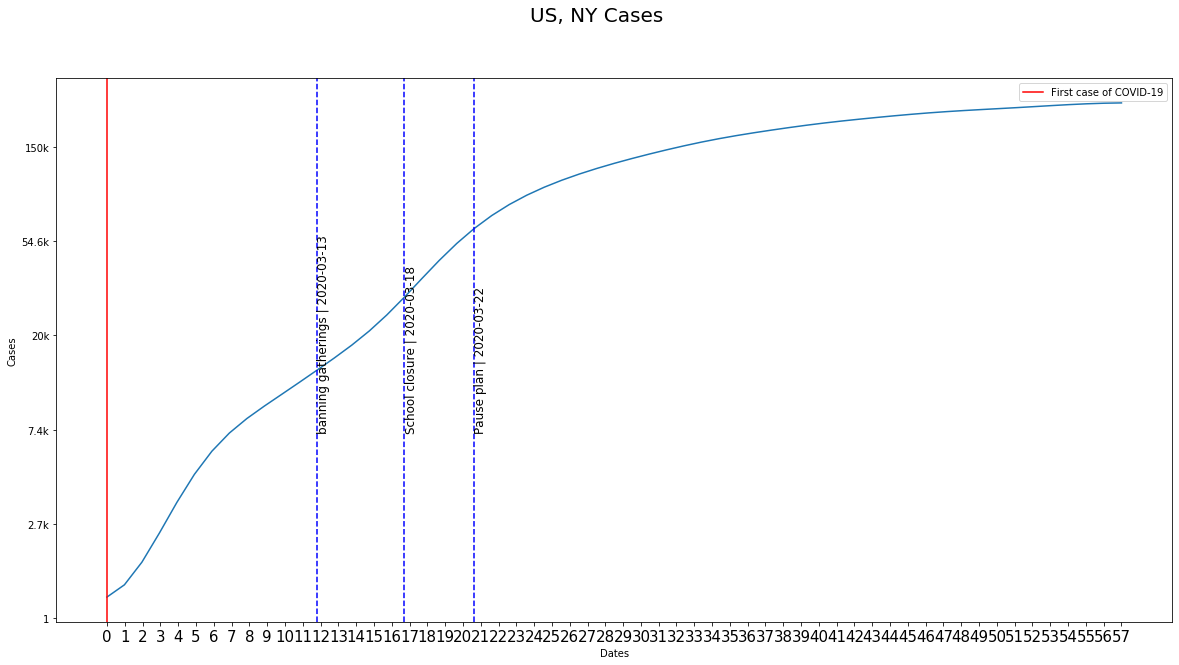

In [59]:
from scipy.interpolate import splrep, splev
from scipy.ndimage.filters import gaussian_filter1d



plt.figure(figsize=(20, 10))

# x =  np.linspace(0, 48, num=49)
# A_tck = splrep(x,  np.log10(list(saudi_cases['Cases'])))
# dates = days_list
# x_new = np.linspace(x.min(), x.max(), 300)
# A_new = splev(x_new, A_tck)
# plt.plot(x_new, A_new, label='A')
ysmoothed = gaussian_filter1d(np.log10(df_usa['cases']), sigma=2)
plt.plot(days, ysmoothed)
plt.yticks([0,1,2,3,4], ['1','2.7k','7.4k','20k','54.6k'])
# plt.xticks(x, dates, size='small')
plt.suptitle('US, DC Cases', size=20)
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.axvline('0',color='r',label="First case of COVID-19")
column_names = ["cases", "Days", "Dates", 'Actions']

events = pd.DataFrame(columns = column_names)
events['Cases'] = df_usa['cases']
events['Days'] = df_usa['Days'] 
events['Dates'] = df_usa['date']
events['Actions'] = ''
evActions = list(events['Actions'])
z = 0


for w in range(0,7):
    events.Cases.iloc[w] = 1
    
ActionsDates = ['2020-03-12','2020-03-17','2020-03-23']
ActionsValues = ['banning gatherings','School shutdown','Home lockdown']

lis1 = []
    
for w in ActionsDates:
    for x in range(0,len(list(events['Dates']))):
        if(events.Dates.iloc[x] == w):
            events.Actions.iloc[x] = ActionsValues[z]

    print(ActionsValues[z])
    z = 1 + z




#events['Actions'] = lis1
evDays = events['Days']
evActions = list(events['Actions'])
evdates = events['Dates']


x =  np.linspace(0, 100, num=100)
plt.xticks(x, days, size='small')
plt.yticks([0,1,2,3,4], ['1','2.7k','7.4k','20k','54.6k'])

j=0
for x in evDays:
    if (evActions[j] != ''):
        plt.axvline(x,color='b',linestyle='dashed')
        plt.text(x,2,evActions[j] + " | " + str(evdates[j]),rotation=90,fontsize=12)
    j = j + 1

plt.legend()
plt.show()


from scipy.interpolate import splrep, splev
from scipy.ndimage.filters import gaussian_filter1d



plt.figure(figsize=(20, 10))

ysmoothed = gaussian_filter1d(np.log10(df_usan['cases']), sigma=2)
plt.plot(daysn, ysmoothed)
plt.suptitle('US, NY Cases', size=20)
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.axvline('0',color='r',label="First case of COVID-19")
plt.yticks([0,1,2,3,4,5], ['1','2.7k','7.4k','20k','54.6k','150k'])
 
column_names = ["cases", "Days", "Dates", 'Actions']

eventsn = pd.DataFrame(columns = column_names)
eventsn['Cases'] = df_usan['cases']
eventsn['Days'] = df_usan['Days'] 
eventsn['Dates'] = df_usan['date']
eventsn['Actions'] = ''
evActionsn = list(events['Actions'])
z = 0


for w in range(0,7):
    events.Cases.iloc[w] = 1
    
ActionsDatesn = ['2020-03-13','2020-03-18','2020-03-22']
ActionsValuesn = ['banning gatherings','School closure','Pause plan']

lis1 = []
    
for w in ActionsDatesn:
    for x in range(0,len(list(eventsn['Dates']))):
        if(eventsn.Dates.iloc[x] == w):
            eventsn.Actions.iloc[x] = ActionsValuesn[z]

    print(ActionsValuesn[z])
    z = 1 + z




#events['Actions'] = lis1
evDaysn = eventsn['Days']
evActionsn = list(eventsn['Actions'])
evdatesn = eventsn['Dates']


x =  np.linspace(0, 58, num=58)
plt.xticks(x, daysn, size=15)

j=0
for x in evDaysn:
    if (evActionsn[j] != ''):
        plt.axvline(x,color='b',linestyle='dashed')
        plt.text(x,2,evActionsn[j] + " | " + str(evdatesn[j]),rotation=90,fontsize=12)
    j = j + 1

plt.legend()
plt.show()

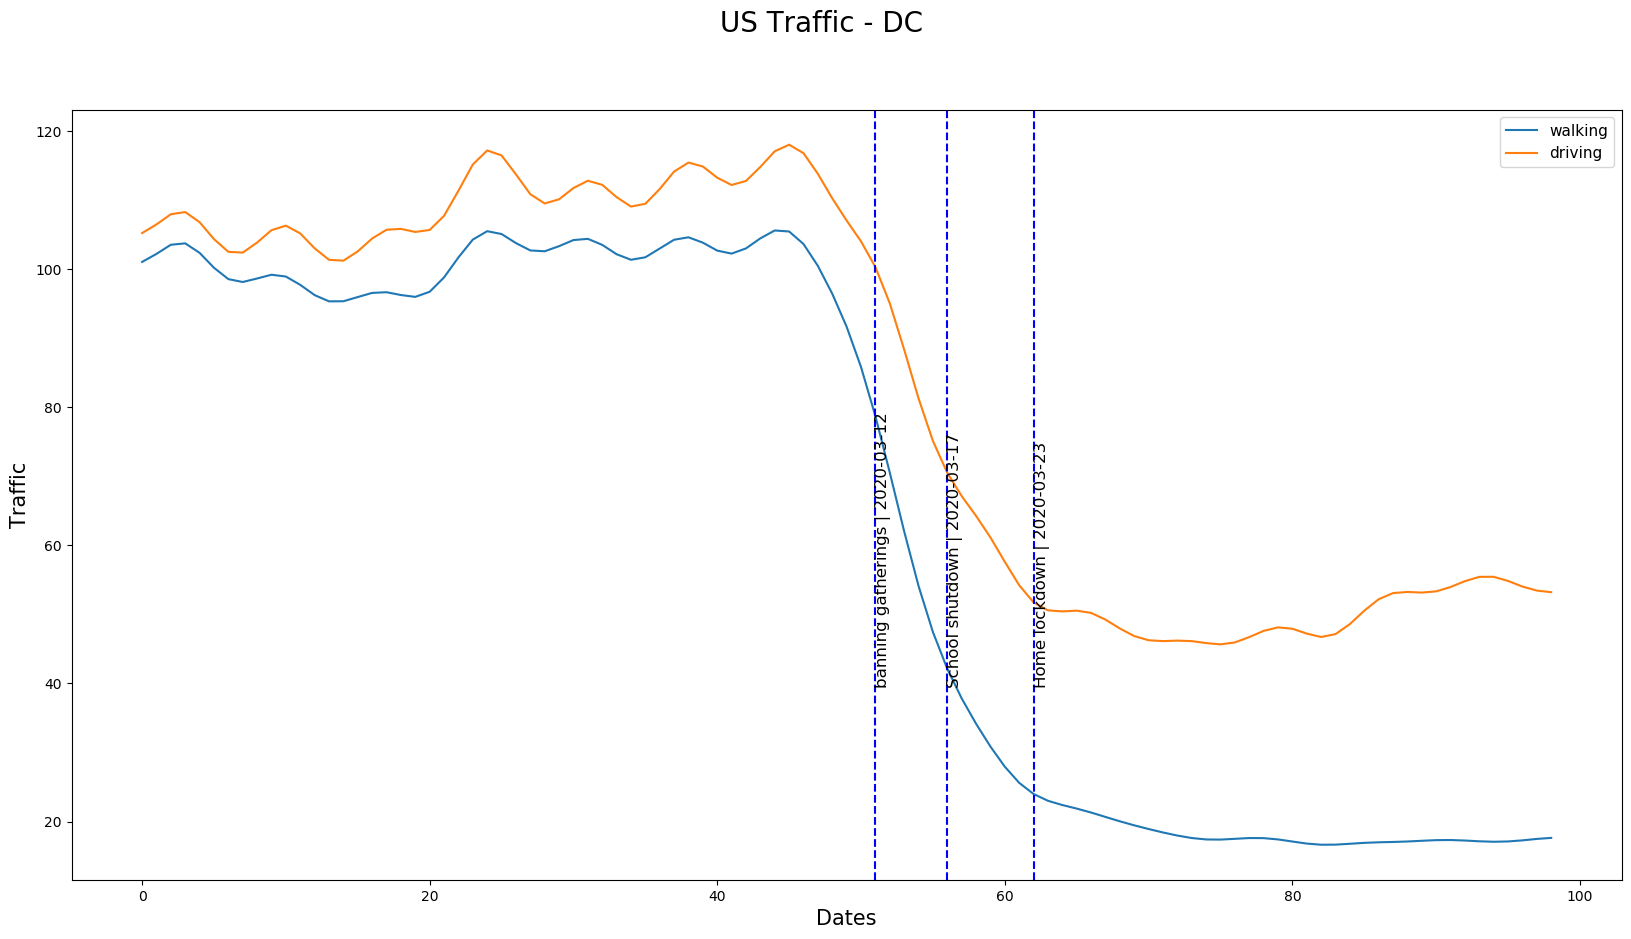

In [77]:
plt.figure(figsize=(20, 10))
# plt.plot(days, walking, label="walking");
# plt.plot(days, driving, label="driving");
ysmoothed = gaussian_filter1d(walkingdc, sigma=2)
plt.plot(days, ysmoothed, label="walking")
ysmoothed2 = gaussian_filter1d(drivingdc, sigma=2)
plt.plot(days, ysmoothed2, label="driving")
plt.suptitle('US Traffic - DC',size=20)
plt.xlabel("Dates",size=15)
plt.ylabel("Traffic",size=15)
# plt.plot(days, walking, label="walking");
# plt.plot(days, driving, label="driving");
# ysmoothed = gaussian_filter1d(np.log10(saudi_cases['Cases']), sigma=2)
# plt.plot(days, ysmoothed, label="Cases")


j=0
for x in evDays:
    if evActions[j] != '':
        plt.axvline(x,color='b',linestyle='dashed')
        plt.text(x,40,evActions[j] + " | " + str(evdates[j]),rotation=90,fontsize=12)
    j = j + 1
# plt.suptitle('Saudi Arabia Cases')
# plt.xlabel("Dates")
# plt.ylabel("Cases")
plt.legend(prop={'size': 11})
plt.show()

111
['1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20', '4/27/20', '4/28/20',

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



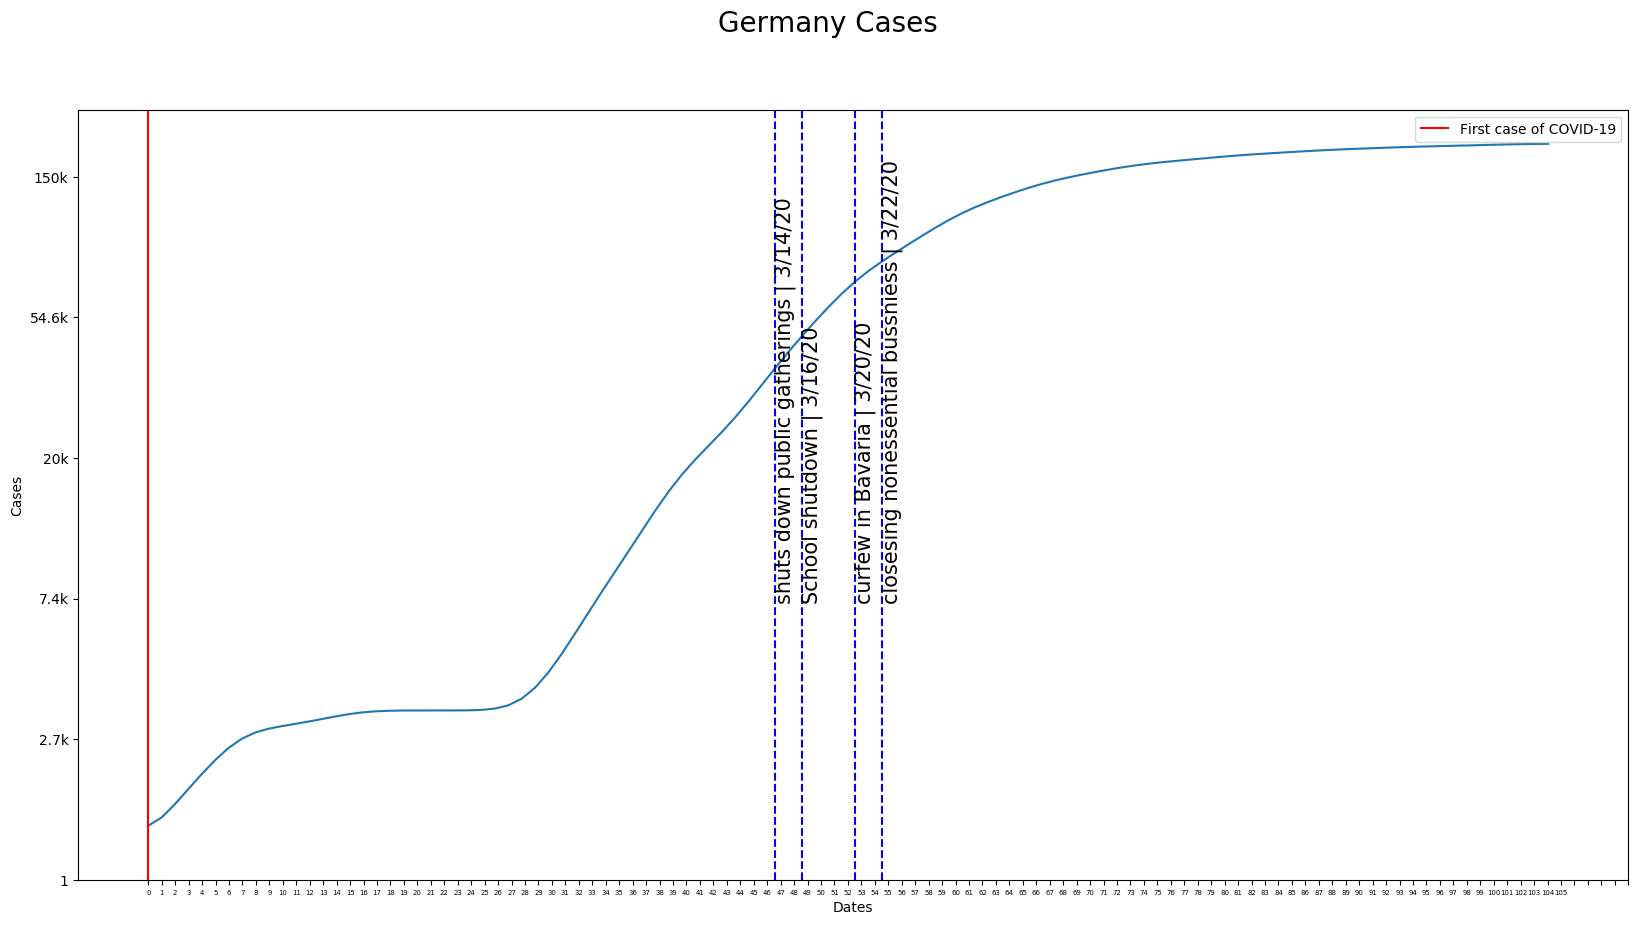

In [104]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-05-2020.csv')

cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
germany_cases = []

days = []
dates = confirmed.keys()
dateslist = list(dates)

for i in dates:
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())




for i in range(0,5):
    germany_cases.pop(0)
    dateslist.pop(0)

for w in range(0,len(list(germany_cases))):
    days.append(w)

print(len(list(dates)))
print(dateslist)

column_names = ["cases", "Days", "Dates", 'Actions']

events = pd.DataFrame(columns = column_names)
events['Cases'] = germany_cases
events['Days'] = days
events['Dates'] = dateslist
events['Actions'] = ''
evActions = list(events['Actions'])
z = 0


for w in range(0,7):
    events.Cases.iloc[w] = 1
    
ActionsDates = ['3/14/20','3/16/20','3/20/20','3/22/20']
ActionsValues = ['shuts down public gatherings','School shutdown','curfew in Bavaria','closesing nonessential bussniess']

lis1 = []
    
for w in ActionsDates:
    for x in range(0,len(list(events['Dates']))):
        if(events.Dates.iloc[x] == w):
            events.Actions.iloc[x] = ActionsValues[z]

    print(ActionsValues[z])
    z = 1 + z



#events['Actions'] = lis1
evDays = events['Days']
evActions = list(events['Actions'])
evdates = events['Dates']

plt.figure(figsize=(20, 10))

ysmoothed = gaussian_filter1d(np.log10(germany_cases), sigma=2)
plt.plot(days, ysmoothed)
plt.suptitle('Germany Cases', size=20)
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.axvline('0',color='r',label="First case of COVID-19")
plt.yticks([0,1,2,3,4,5], ['1','2.7k','7.4k','20k','54.6k','150k'])
x =  np.linspace(0, 111, num=111)
plt.xticks(x, days, size=5)

j=0
for x in evDays:
    if (evActions[j] != ''):
        plt.axvline(x,color='b',linestyle='dashed')
        plt.text(x,2,evActions[j] + " | " + str(evdates[j]),rotation=90,fontsize=15)
    j = j + 1

plt.legend()
plt.show()

In [78]:
date_usa = datetime.strptime(df_confirmed.columns[-1],'%m/%d/%y').strftime("%m-%d-%Y")
df_temp = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+date_usa+".csv")
df_usa = df_temp.loc[df_temp["Country_Region"]== "US"]
df_usa = df_usa.rename(columns={"Admin2":"County"})

In [79]:
total = df_usa.sum()
total.name = "Total"
pd.DataFrame(total).transpose().loc[:,["Confirmed","Deaths"]].style.background_gradient(cmap='Purples',axis=1)

,Confirmed,Deaths
Total,1347881,80682


In [80]:
ages = []
agesf =  []
totalschool = 0
saudi_pop = pd.read_csv("populationage.csv", sep =";") 
saudi_pop = saudi_pop.loc[saudi_pop['Year'] == 2018]
saudi_pop = saudi_pop.sort_values(by=['Age Groups'])
saudi_pop1 = saudi_pop

In [81]:
saudi_pop1.head()

,Year,Age Groups,Nationality,Gender,Population
57,2018,0 - 4,Non-Saudi,Female,283015
19,2018,0 - 4,Saudi,Male,1123261
56,2018,0 - 4,Saudi,Female,1084529
38,2018,0 - 4,Non-Saudi,Male,298126
87,2018,10 - 14,Non-Saudi,Male,310548


In [82]:
saudi_pop1['Age Groups'].unique()

array(['0 - 4', '10 - 14', '15 - 19', '20 - 24', '25 - 29', '30 - 34',
       '35 - 39', '40 - 44', '45 - 49', '5 - 9', '50 - 54', '55 - 59',
       '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80+'], dtype=object)

[1239, 1527, 1644, 1584, 1647, 1597, 1651, 1661, 1785, 1683, 1754, 1705, 1742, 1663, 1688, 1809, 1859, 1730, 1626, 1542, 1467, 1564, 1525, 1557, 1602, 1711, 1776, 1711, 1657, 1625, 1720, 1873, 1629, 1684, 1786, 1746, 1767, 1715, 1590, 1582, 1563, 1617, 1547, 1534, 1592, 1757, 1688, 1644, 1617, 1624, 1715, 1843, 1853, 1871, 1831, 1881, 1979, 1908, 1881, 1873, 1834, 1781, 1715, 1635, 1767, 1606, 1481, 1530, 1446, 1538, 1195, 1078, 1055, 1031, 940, 917, 810, 698, 672, 676, 2625, 2488]


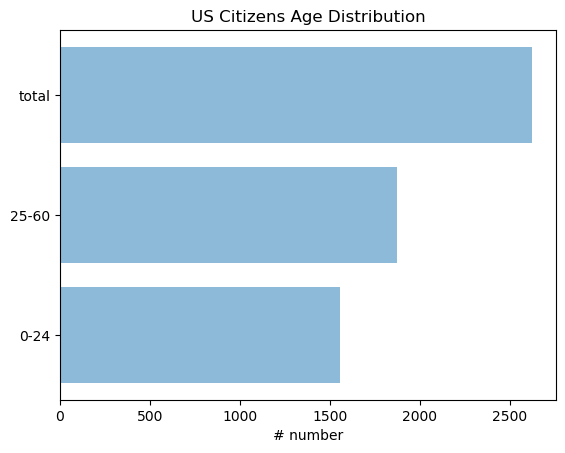

10321202 19227675


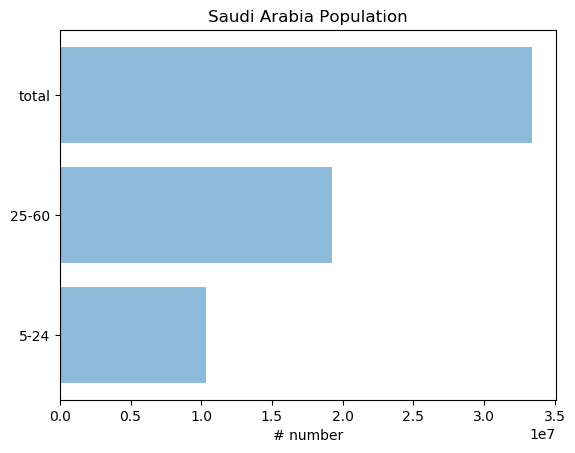

[2788931, 2895637, 2536312, 2312755, 2576498, 33413660, 3189330, 3230441, 3605004, 3223846, 2393995, 1670297, 1153898, 760864]


In [83]:
import numpy as np
import pandas as pd

import plotly as py
import plotly.graph_objs as go
from plotly import tools

survey_data = pd.read_csv('cps_2016-08.csv',
                          usecols=[0, 3, 11, 16, 17, 18, 32, 43, 45, 47, 48, 51, 52, 65,
                                   69, 91, 189, 210, 220, 222, 226, 229, 242, 243, 244])


survey_data = survey_data.rename(
    columns={'HRHHID':'household_id', 'HURESPLI':'person_id', 'HRINTSTA':'interview',
             'GESTFIPS':'state', 'HRHTYPE':'household_type', 'HRNUMHOU':'household_count', 
             'HEFAMINC':'household_income', 'PESEX':'sex', 'PRTAGE':'age',
             'PTDTRACE':'race', 'PRCITSHP':'citizenship', 'PEEDUCA':'education',
             'PEMARITL':'marriage', 'PEMLR':'work_status', 'PEIO1COW':'work_type',
             'PRMJIND1':'work_industry', 'PEHRUSLT':'work_hours', 'PEERNPER':'pay_period',
             'PEERNHRY':'pay_type', 'PRERNHLY':'hourly_wage', 'PESCHENR':'school_status',
             'PESCHFT':'school_hours', 'PESCHLVL':'school_type'})
survey_data = survey_data[survey_data.interview == 1]

survey_individual = survey_data[['household_id', 'person_id', 'state', 'sex', 'age',
                                 'race', 'citizenship', 'education', 'marriage',
                                 'work_status', 'work_type', 'work_industry',
                                 'work_hours', 'pay_period', 'pay_type', 'hourly_wage',
                                 'school_status', 'school_hours', 'school_type']]

# distribution of age in population survey
age_count = np.asarray(survey_individual.groupby('age').age.count())
US_ages = list(survey_individual.groupby('age').age.count())
print(list(survey_individual.groupby('age').age.count()))


for n in range(0,24):
    schooltotal = US_ages[n]

for n in range(25,60):
    worktotal = US_ages[n]
    


for n in range(0,81):
    ustotal = US_ages[n]
    
    
objects = ('0-24', '25-60', 'total')
y_pos = np.arange(len(objects))
performance = [schooltotal,worktotal,ustotal]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('# number')
plt.title('US Citizens Age Distribution')

plt.show()


# populition & age group
totalwork = 0
totalschool = 0

saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "0 - 4"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])

saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "5 - 9"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalschool = ages[0][0] + totalschool


saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "10 - 14"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalschool = ages[0][0] + totalschool

saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "15 - 19"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalschool = ages[0][0] + totalschool

saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "20 - 24"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalschool = ages[0][0] + totalschool

saudi_age = saudi_pop.groupby(saudi_pop['Age Groups']).sum()
saudi_age = saudi_age.groupby(saudi_age['Year']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])

###########################################
 
saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "25 - 29"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalwork = ages[0][0] + totalwork
                          
saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "30 - 34"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalwork = ages[0][0] + totalwork

saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "35 - 39"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalwork = ages[0][0] + totalwork

saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "40 - 44"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalwork = ages[0][0] + totalwork

saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "45 - 49"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalwork = ages[0][0] + totalwork

saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "50 - 54"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalwork = ages[0][0] + totalwork

saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "55 - 59"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalwork = ages[0][0] + totalwork

saudi_age = saudi_pop.loc[saudi_pop['Age Groups'] == "60 - 64"]
saudi_age = saudi_age.groupby(saudi_pop['Age Groups']).sum()
ages = []
ages.append(list(saudi_age["Population"]))
agesf.append(ages[0][0])
totalwork = ages[0][0] + totalwork

#############################################

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

print(str(totalschool) + " " + str(totalwork))

objects = ('5-24', '25-60', 'total')
y_pos = np.arange(len(objects))
performance = [totalschool,totalwork,agesf[5]]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('# number')
plt.title('Saudi Arabia Population')

plt.show()


print(agesf)
#store age group 10 - 14,15-19,20-24
# saudi_pop.head(50)

In [84]:
# Mortality rate | Recovery 
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-05-2020.csv')


In [85]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

dates = confirmed.keys()

us_cases = [] 
us_deaths = []
germany_cases = []
germany_deaths = [] 
Saudi_cases = []
Saudi_deaths = [] 
us_recoveries = [] 
germany_recoveries = []
Saudi_recoveries = []

for i in dates:
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    Saudi_cases.append(confirmed_df[confirmed_df['Country/Region']=='Saudi Arabia'][i].sum())
    
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    Saudi_deaths.append(deaths_df[deaths_df['Country/Region']=='Saudi Arabia'][i].sum())
    
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    germany_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Germany'][i].sum())
    Saudi_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Saudi Arabia'][i].sum())

mortality_rate_US = []
recovery_rate_US = []
recovery_rate_ger = []
mortality_rate_ger = []
recovery_rate_SA = []
mortality_rate_SA = []

for b in range(0,len(us_cases)-1):
    recovery_rate_US.append(us_recoveries[b]/us_cases[b])
    
for b in range(0,len(us_cases)-1):
    mortality_rate_US.append(us_deaths[b]/us_cases[b])
    
for b in range(0,len(germany_cases)-1):
    recovery_rate_ger.append(germany_recoveries[b]/germany_cases[b])
    
for b in range(0,len(germany_cases)-1):
    mortality_rate_ger.append(germany_deaths[b]/germany_cases[b])
    
for b in range(0,len(Saudi_cases)-1):
    recovery_rate_SA.append(Saudi_recoveries[b]/Saudi_cases[b])
    
for b in range(0,len(Saudi_cases)-1):
    mortality_rate_SA.append(Saudi_deaths[b]/Saudi_cases[b])


gerdays = []
for n in range(0,len(germany_cases)-1):
    gerdays.append(n)

sadays = []
for n in range(0,len(Saudi_cases)-1):
    sadays.append(n)
    
usday = []
for n in range(0,len(us_cases)-1):
    usday.append(n)




print(sadays)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning:

invalid value encountered in longlong_scalars



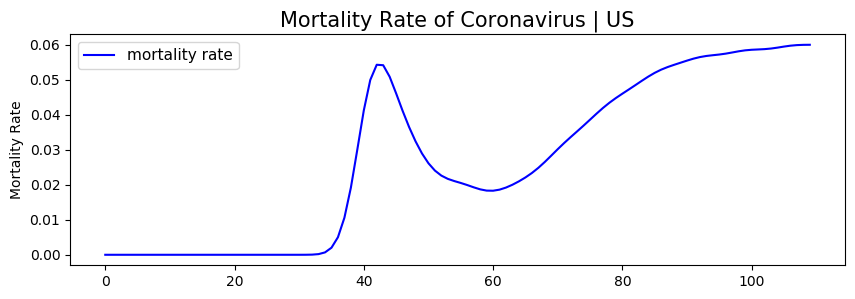

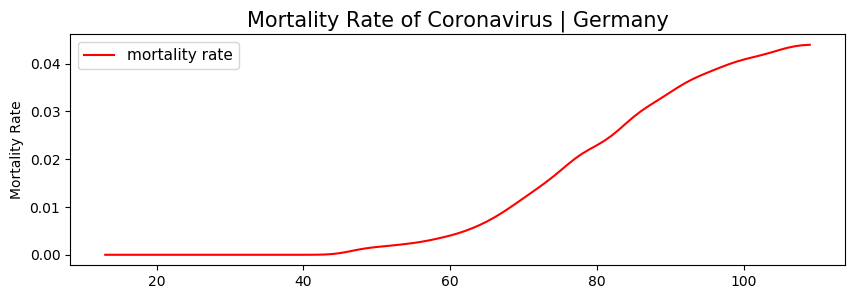

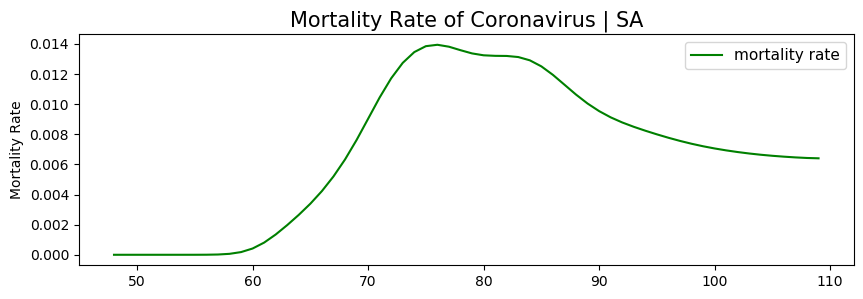

In [86]:

plt.figure(figsize=(10, 3))

ysmoothed = gaussian_filter1d(mortality_rate_US, sigma=2)
plt.plot(usday, ysmoothed, color='blue')
plt.title('Mortality Rate of Coronavirus | US', size=15)
plt.legend(['mortality rate'], prop={'size': 11})
plt.ylabel('Mortality Rate')
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()


plt.figure(figsize=(10, 3))
ysmoothed = gaussian_filter1d(mortality_rate_ger, sigma=2)
plt.plot(gerdays, ysmoothed, color='red')
plt.title('Mortality Rate of Coronavirus | Germany', size=15)
plt.legend(['mortality rate'], prop={'size': 11})
plt.ylabel('Mortality Rate')
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

plt.figure(figsize=(10, 3))
ysmoothed = gaussian_filter1d(mortality_rate_SA, sigma=2)
plt.plot(sadays, ysmoothed, color='green')
plt.title('Mortality Rate of Coronavirus | SA', size=15)
plt.legend(['mortality rate'], prop={'size': 11})
plt.ylabel('Mortality Rate')
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

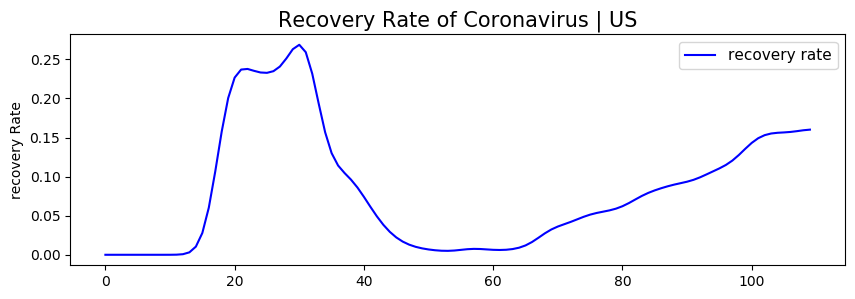

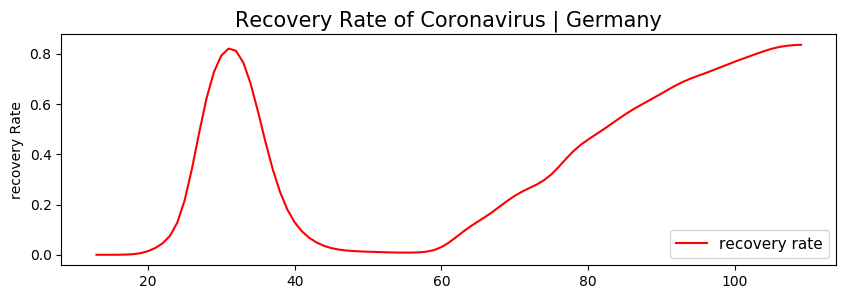

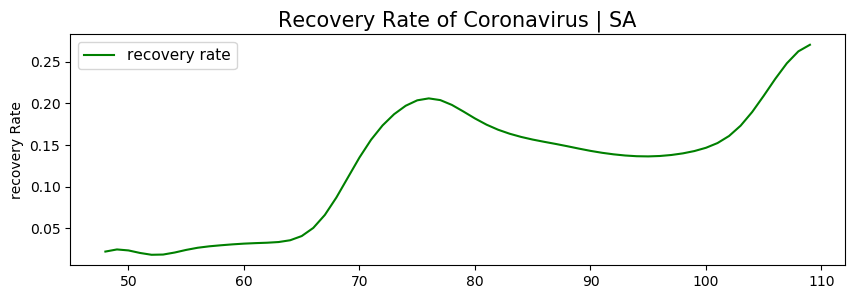

In [87]:

plt.figure(figsize=(10, 3))
ysmoothed = gaussian_filter1d(recovery_rate_US, sigma=2)
plt.plot(usday, ysmoothed, color='blue')
plt.title('Recovery Rate of Coronavirus | US', size=15)
plt.legend(['recovery rate'], prop={'size': 11})
plt.ylabel('recovery Rate')
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()


plt.figure(figsize=(10, 3))
ysmoothed = gaussian_filter1d(recovery_rate_ger, sigma=2)
plt.plot(gerdays, ysmoothed, color='red')
plt.title('Recovery Rate of Coronavirus | Germany', size=15)
plt.legend(['recovery rate'], prop={'size': 11})
plt.ylabel('recovery Rate')
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()


plt.figure(figsize=(10, 3))
ysmoothed = gaussian_filter1d(recovery_rate_SA, sigma=2)
plt.plot(sadays, ysmoothed, color='green')
plt.title('Recovery Rate of Coronavirus | SA', size=15)
plt.legend(['recovery rate'], prop={'size': 11})
plt.ylabel('recovery Rate')
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
# identifying and isolating infected individuals

# testing dataset
# Saudi Cases map
  

# Health ads
# poverty